<a href="https://colab.research.google.com/github/Deepaksisothiya/Hospital-Emergency-Room-Dashboard/blob/main/Movie_Ratings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# (Optional) create movies.csv inside Colab automatically
import pandas as pd, numpy as np
np.random.seed(42)
n=500
titles=[f"Movie {i}" for i in range(1,n+1)]
years=np.random.choice(range(1980,2024),n)
genres=np.random.choice(['Drama','Comedy','Action','Thriller','Romance','Sci-Fi','Horror','Documentary'],n)
directors=np.random.choice([f'Director {c}' for c in list('ABCDEFGHIJ')], n)
ratings=np.round(np.random.normal(6.5,1.2,n),1)
ratings[np.random.choice(n,30,replace=False)] = np.nan
budgets=np.round(np.abs(np.random.normal(30000,20000,n)),0)
revenues=np.round(np.abs(np.random.normal(80000,60000,n)),0)
budgets[np.random.choice(n,20,replace=False)] = np.nan
revenues[np.random.choice(n,25,replace=False)] = np.nan

df=pd.DataFrame({'Title':titles,'Year':years,'Genre':genres,'Director':directors,
                 'Rating':ratings,'Budget':budgets,'Revenue':revenues})
df.to_csv('movies.csv', index=False)
print('movies.csv created in Colab with', len(df), 'rows')
df.head()


movies.csv created in Colab with 500 rows


,Title,Year,Genre,Director,Rating,Budget,Revenue
0,Movie 1,2018,Horror,Director C,NaN,17956.0,30655.0
1,Movie 2,2008,Thriller,Director G,7.6,39375.0,147262.0
2,Movie 3,1994,Comedy,Director C,6.5,10032.0,80012.0
3,Movie 4,2022,Romance,Director G,6.5,36036.0,79442.0
4,Movie 5,1987,Comedy,Director B,6.8,45322.0,60326.0


     Title  Year     Genre    Director  Rating   Budget   Revenue
0  Movie 1  2018    Horror  Director C     NaN  17956.0   30655.0
1  Movie 2  2008  Thriller  Director G     7.6  39375.0  147262.0
2  Movie 3  1994    Comedy  Director C     6.5  10032.0   80012.0
3  Movie 4  2022   Romance  Director G     6.5  36036.0   79442.0
4  Movie 5  1987    Comedy  Director B     6.8  45322.0   60326.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     500 non-null    object 
 1   Year      500 non-null    int64  
 2   Genre     500 non-null    object 
 3   Director  500 non-null    object 
 4   Rating    470 non-null    float64
 5   Budget    480 non-null    float64
 6   Revenue   475 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 27.5+ KB
None
Title        0
Year         0
Genre        0
Director     0
Rating      30
Budget

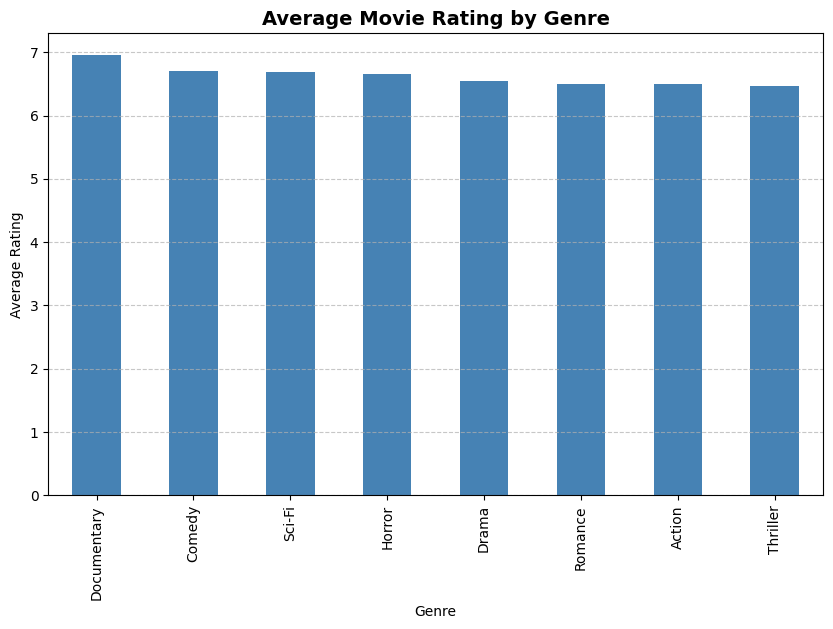

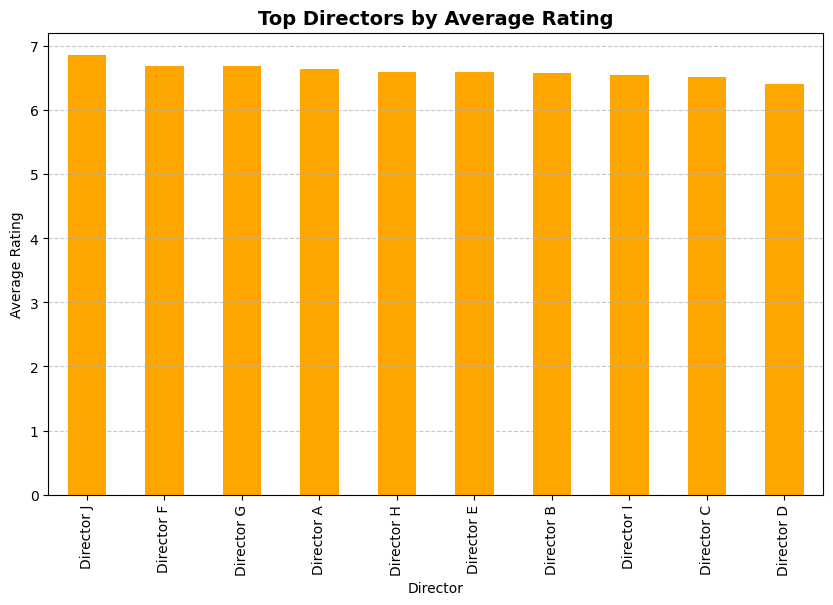

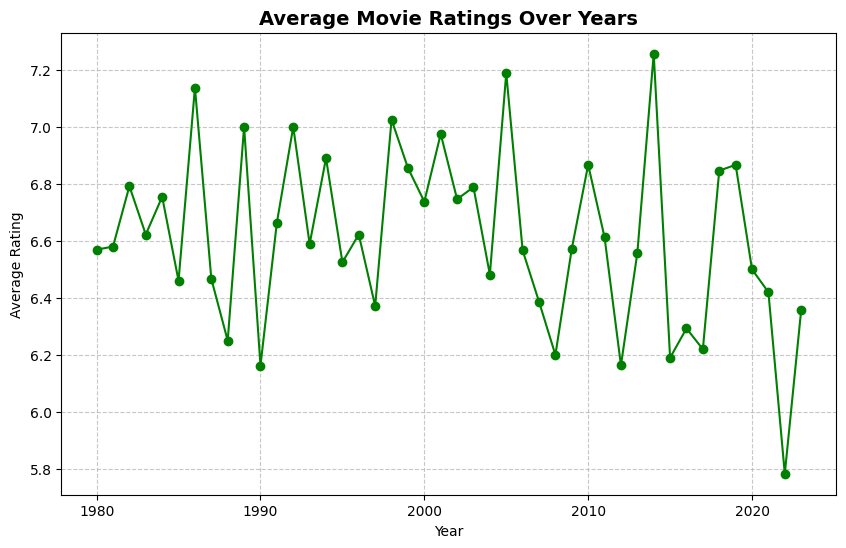

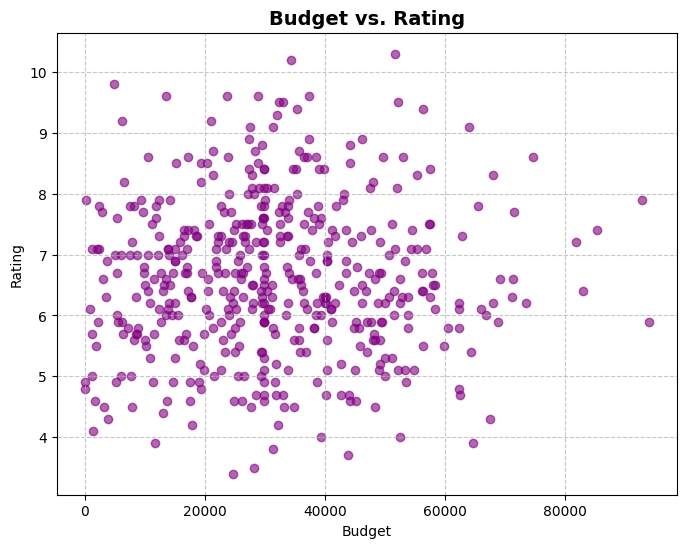

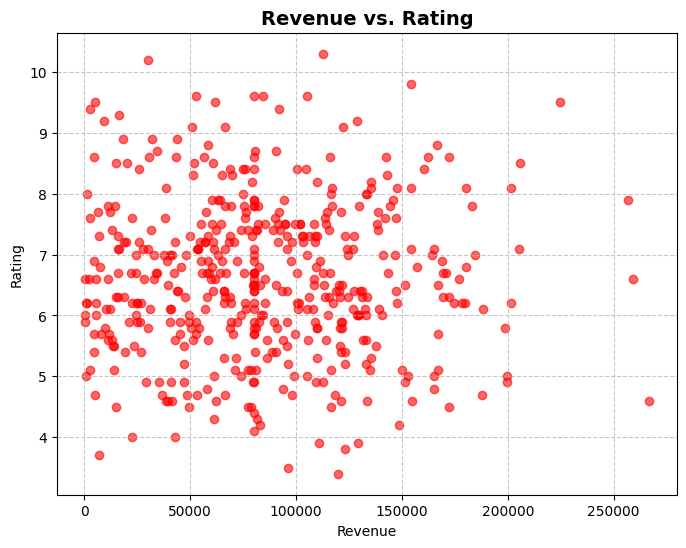

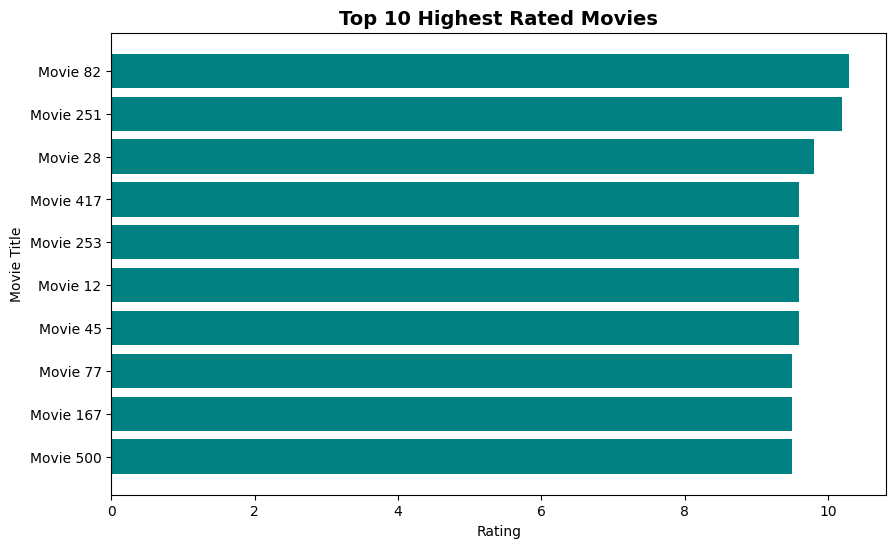

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and Inspect Data
df = pd.read_csv("movies.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())

# 2. Data Cleaning
df = df.dropna(subset=["Rating"])
df["Budget"] = df["Budget"].fillna(df["Budget"].median())
df["Revenue"] = df["Revenue"].fillna(df["Revenue"].median())

# 3. Statistical Analysis with NumPy
ratings = df["Rating"].to_numpy()
budgets = df["Budget"].to_numpy()
revenues = df["Revenue"].to_numpy()

print("Ratings -> Mean:", np.mean(ratings), " Median:", np.median(ratings), " Std:", np.std(ratings))
print("Budget -> Mean:", np.mean(budgets), " Median:", np.median(budgets), " Std:", np.std(budgets))
print("Revenue -> Mean:", np.mean(revenues), " Median:", np.median(revenues), " Std:", np.std(revenues))

# 4. Grouped Analysis with Pandas
genre_avg = df.groupby("Genre")["Rating"].mean().sort_values(ascending=False)
print("Average Rating by Genre:\n", genre_avg)

director_avg = df.groupby("Director")["Rating"].mean().sort_values(ascending=False).head(10)
print("Average Rating by Director:\n", director_avg)

year_avg = df.groupby("Year")["Rating"].mean()
print("Average Rating by Year:\n", year_avg)

# 5. Visualizations with Matplotlib
plt.figure(figsize=(10,6))
genre_avg.plot(kind="bar", color="steelblue")
plt.title("Average Movie Rating by Genre", fontsize=14, fontweight="bold")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(10,6))
director_avg.plot(kind="bar", color="orange")
plt.title("Top Directors by Average Rating", fontsize=14, fontweight="bold")
plt.xlabel("Director")
plt.ylabel("Average Rating")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_avg.index, year_avg.values, marker="o", color="green")
plt.title("Average Movie Ratings Over Years", fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(df["Budget"], df["Rating"], alpha=0.6, color="purple")
plt.title("Budget vs. Rating", fontsize=14, fontweight="bold")
plt.xlabel("Budget")
plt.ylabel("Rating")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(df["Revenue"], df["Rating"], alpha=0.6, color="red")
plt.title("Revenue vs. Rating", fontsize=14, fontweight="bold")
plt.xlabel("Revenue")
plt.ylabel("Rating")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

top_movies = df.sort_values(by="Rating", ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_movies["Title"], top_movies["Rating"], color="teal")
plt.title("Top 10 Highest Rated Movies", fontsize=14, fontweight="bold")
plt.xlabel("Rating")
plt.ylabel("Movie Title")
plt.gca().invert_yaxis()
plt.show()
